## Strawberry Fields 

Hossein Davoodi Yeganeh

AriaQuanta Quantum Computing

##  Introduction

Strawberry Fields is an open-source framework for photonic quantum computing. In particular, Strawberry Fields allows for the following workflows:

$1$) Construct and simulate continuous-variable quantum photonic circuits. Provided simulators include highly optimized Gaussian, Fock, and Bosonic numeric backends, as well as a TensorFlow backend for backpropagation.

$2$) Compile and submit photonic circuits for remote execution on Xanadu’s quantum hardware, retrieve your results, and manage multiple jobs.

$3$) Use our high-level functions for graph and network optimization, machine learning, and chemistry applications — all executable on near-term hardware.


# Blackbird: A Quantum Programming Language

Quantum computers are still at an early stage of
development, so while we can imagine what higher-level
quantum programming might look like, in the near term we
first need to build languages which are conceptually closer
to the quantum hardware.

`Blackbird` is a standalone domain specific language (DSL)
for continuous-variable quantum computation. With a welldefined grammar in extended Backus-Naur form, and both
Python and C++ parsers available, Blackbird provides operations that match the basic CV states, gates, and measurements, and maps directly to low-level hardware instructions. The abstract syntax keeps a close connection between
code and the quantum operations that they implement. Blackbird can be used as part of
the Strawberry Fields stack, but also directly with photonic
quantum computing hardware systems. Within the Strawberry Fields framework, we have built
an implementation of Blackbird using Python 3 as the embedding language — an ‘embedded’ DSL. This `Pythonenhanced` `Blackbird` language provides the same core operations and follows the same grammar and syntactical rules
as the standalone DSL, but, by nature, may also contain
valid Python constructs.


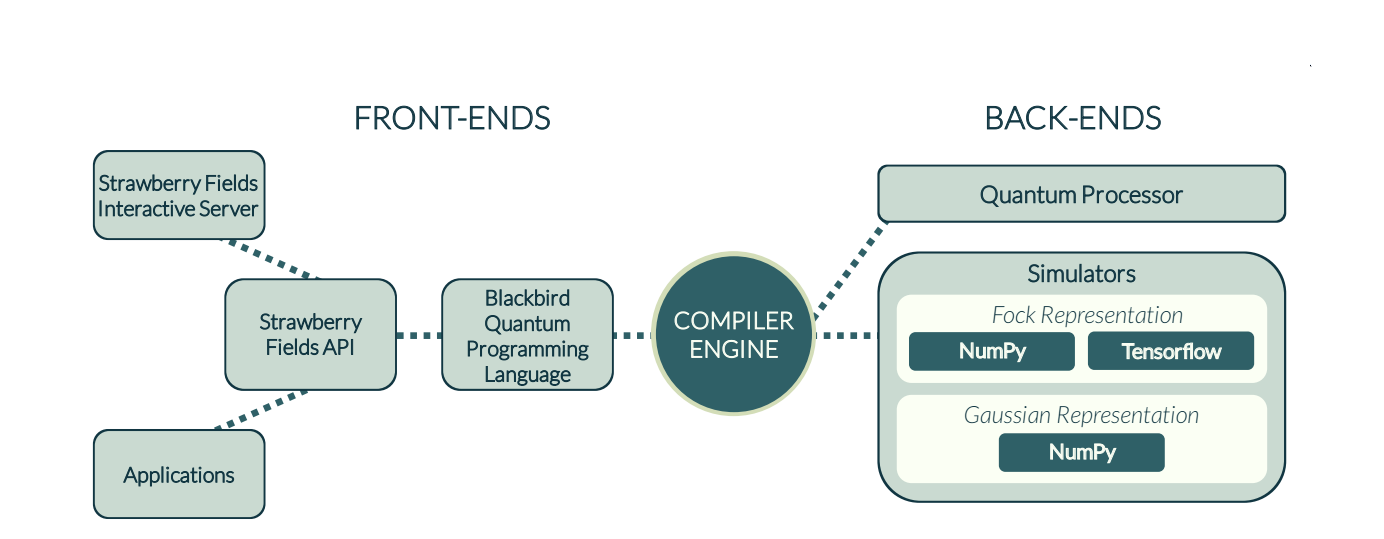

In [3]:
from IPython.display import Image
Image(filename='sf1.png')

# Installation

Strawberry Fields supports Python 3.7 or newer(3.10)

`pip install strawberryfields`




# Continuous Variable(CV)  quantum states
(In Strawberry Fields we use the convention$ ℏ=2$ by default, but other conventions can also be chosen by setting the global variable `sf.hbar` at the beginning of a session.)

## States

1. Gaussian States

$$|\psi⟩_\text{Gaussian} = \left(\bigotimes_i D_i(\alpha_i) \right)\mathcal{U}
\left(\bigotimes_i S_i(z_i) \right) |0⟩$$

2. Fock basis (The Fock basis is non-Gaussian, a single mode state can be decomposed into the Fock basis)

$$|\psi⟩=\sum_n c_n |c⟩$$

3. Vacuum state (The vacuum state $|0⟩$ is a Gaussian state defined by)

$$|0⟩ = \frac{1}{\sqrt[4]{\pi \hbar}}\int dx~e^{-x^2/(2 \hbar)}|x⟩ ~~\text{where}~~
\hat{a}|0⟩=0$$

4. Coherent state (The coherent state $|α⟩$, $α∈C$ is a displaced vacuum state )

$$|\alpha⟩ = D(\alpha)|0⟩$$

5. Squeezed state (The squeezed state $|z⟩$, $z=re^(iϕ)$ is a squeezed vacuum state

$$|z⟩ = S(z)|0⟩$$

6. Displaced squeezed state (The displaced squeezed state $|α,z⟩$, $α∈C$, $z=re^(iϕ)$ is a displaced and squeezed vacuum state )

$$|\alpha,z⟩ = D(\alpha)S(z)|0⟩$$

7. Thermal state (The thermal state is a mixed Gaussian state )

$$\rho(\bar{n}) := \sum_{n=0}^\infty\frac{\bar{n}^n}{(1+\bar{n})^{n+1}}|\bar{n}⟩\langle \bar{n}|$$

8. Cat state (The cat state is a non-Gaussian superposition of coherent states)

$$|cat\rangle = \frac{e^{-|\alpha|^2/2}}{\sqrt{2(1+e^{-2|\alpha|^2}\cos(\phi))}}
\left(|\alpha\rangle +e^{i\phi}|-\alpha\rangle\right)$$


By default, qumodes are initialized in the vacuum state. Various other important CV states can be created with simple
`Blackbird` commands.

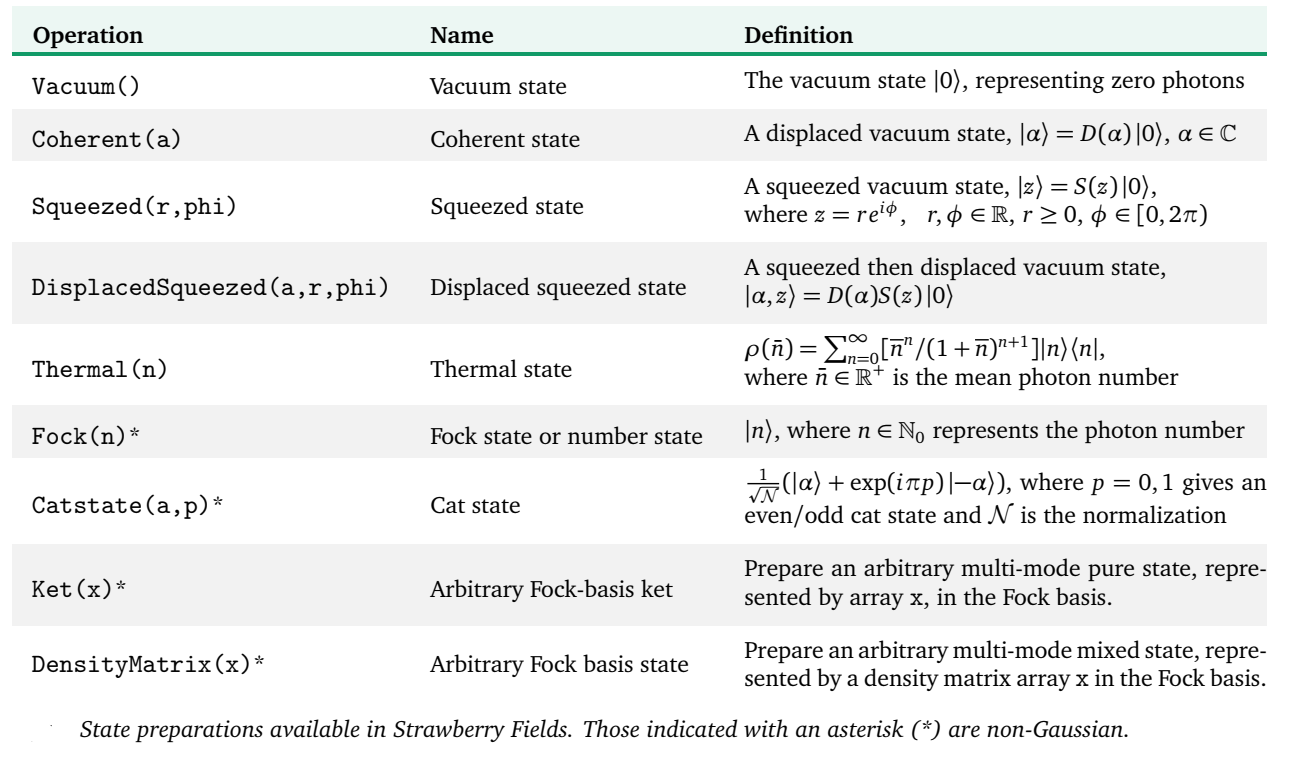

In [14]:
from IPython.display import Image
Image(filename='sf2.png')

In [ ]:
import strawberryfields as sf
from strawberryfields import ops



# Create the vacuum state in qumode 0
Vac | q[0]

# Create a coherent state in qumode 1
alpha = 2.0 + 1j
Coherent(alpha) | q[1]

# Create squeezed states in qumodes 0 & 1
S = Squeezed(2.0)
S | q[0]
S | q[1]

# Create a Fock state in qumode 1
Fock(4) | q[1]



# Operations 

Strawberry Fields supports a wide variety of photonic quantum operations — including gates, state preparations and measurements

# Operators

1. Annihilation and creation operators

As noted in the introduction, some of the basic operators used in CV quantum computation are the bosonic anhilation and creation operators $\hat{a}$ and  $\hat{a}^\dagger$.


\begin{split}&[a_1,a_1^\dagger] = [a_2,a_2^\dagger] = I,\\ &[a_1,a_1]=[a_1,a_2^\dagger]=[a_1,a_2]=[a_2,a_2]=0.\end{split}


2. Quadrature operators

The dimensionless position and momentum quadrature operators $\hat{x}$ and $\hat{p} are defined by

$$\hat{x} = \sqrt{\frac{\hbar}{2}}(a+a^\dagger),~~~ \hat{p} = -i \sqrt{\frac{\hbar}{2}}(a-a^\dagger).$$


They fulfill the commutation relation
$$[\hat{x},\hat{p}]=i\hbar$$

and satisfy the eigenvector equations

$$\hat{x}|x\rangle=x|x\rangle, ~~~ \hat{p}|p\rangle=p|p\rangle$$

he position and momentum operators generate shifts in each others’ eigenstates:
$$\begin{split}e^{-i r \hat{p}\hbar}|x\rangle  = |x+r\rangle,\\ e^{i s \hat{p}\hbar} |p\rangle = |p+s\rangle\end{split}$$

In the vacuum state, the variances of position and momentum are given by

$$\langle 0|\hat{x}^2|0\rangle=\langle 0|\hat{p}^2|0\rangle=\hbar/2$$ 

Note that we can also write the annihilation and creation operators in terms of the quadrature operators:

$$\hat{a}= \sqrt{\frac{1}{2 \hbar}} (\hat{x} +i\hat{p}), ~~~~ \hat{a}^\dagger = \sqrt{\frac{1}{2 \hbar}} (\hat{x} -i\hat{p}).$$


3. Number operator

he number operator is $\hat{n}=\hat{a}^\dagger \hat{a}$, and satisfies the eigenvector equation
$$\hat{n}|n\rangle=n|n\rangle$$


where $|n⟩$ are the Fock states with eigenvalue n. Furthermore, note that

$$\hat{a}^\dagger|n⟩= \sqrt{n+1}|n+1⟩~~~\text{and}~~~~a|n⟩=\sqrt{n}|n-1⟩.$$

## Gates

1. Displacement
$$D(\alpha) = \exp( \alpha \hat{a}^\dagger -\alpha^* a) = \exp(r (e^{i\phi}\hat{a} -e^{-i\phi}\hat{a})),
\quad D^\dagger(\alpha) \hat{a} D(\alpha)=\hat{a} +\alpha I$$

where $α=re^{iϕ}$ with $r≥0$ and $ϕ∈[0,2π)$.

The pure position and momentum displacement operators are defined as

$$\begin{split}X(x) &= D\left( x/\sqrt{2 \hbar}\right)  = \exp(-i x \hat{p} /\hbar),
\quad X^\dagger(x) \hat{x} X(x) = \hat{x} +x I,\\
Z(p) &= D\left(i p/\sqrt{2 \hbar}\right) = \exp(i p \hat{x} /\hbar ),
\quad Z^\dagger(p) \hat{p} Z(p) = \hat{p} +p I.\end{split}$$

2. Squeezing

$$\begin{split}& S(z) = \exp\left(\frac{1}{2}\left(z^* \hat{a}^2-z {\hat{a}^\dagger}^{2} \right) \right) =
\exp\left(\frac{r}{2}\left(e^{-i\phi}\hat{a}^2 -e^{i\phi}{\hat{a}^\dagger}^{2} \right) \right)\\ &
S^\dagger(z) \hat{a} S(z) = \hat{a} \cosh(r) -\hat{a}^\dagger e^{i \phi} \sinh (r)\\ & S^\dagger(z) \hat{a}^\dagger S(z) = \hat{a}^\dagger
\cosh(r) -\hat{a} e^{-i \phi} \sinh(r)\end{split}$$

where $α=re^{iϕ}$ with $r≥0$ and $ϕ∈[0,2π)$.

3. Rotation

$$R(\phi) = \exp\left(i \phi \hat{a}^\dagger \hat{a}\right)=\exp\left(i \frac{\phi}{2} \left(\frac{\hat{x}^2+
\hat{p}^2}{\hbar}-I\right)\right), \quad R^\dagger(\phi) \hat{a} R(\phi) = \hat{a} e^{i \phi}$$

A special case of the rotation operator is the case $ϕ=π/2$; this corresponds to the Fourier gate,

$$F = R(\pi/2) = e^{i (\pi/2) \hat{a}^\dagger  \hat{a}}$$

4. Quadratic phase

$$P(s) = \exp\left(i  \frac{s}{2 \hbar} \hat{x}^2\right),
\quad P^\dagger(s) \hat{a} P(s) = \hat{a} +i\frac{s}{2}(\hat{a} +\hat{a}^\dagger)$$

5. Beamsplitter

$$B(\theta,\phi) = \exp\left(\theta (e^{i \phi}\hat{a}_1 \hat{a}^\dagger_2 - e^{-i \phi} \hat{a}^\dagger_1 \hat{a}_2) \right)$$

A $50%$ or $50-50$ beamsplitter has $θ=π/4$ and $ϕ=0$ or $ϕ=π$.

6. Two-mode squeezing

$$S_2(z) = \exp\left(z \hat{a}^\dagger_1 \hat{a}^\dagger_2 - z^* \hat{a}_1\hat{a}_2 \right) = \exp\left(r (e^{i\phi} \hat{a}^\dagger_1\hat{a}^\dagger_2
-e^{-i\phi} \hat{a}_1 \hat{a}_2 \right)$$

7. Controlled-X gate

$$\text{CX}(s) = \int dx |x\rangle \langle x| \otimes D\left(\frac{s x}{\sqrt{2\hbar}}\right) =
\exp\left({-i \frac{s}{\hbar} \: \hat{x}_1 \otimes \hat{p}_2}\right)$$

8. Controlled-phase

$$\text{CZ}(s) =  \iint dx dy \: e^{i s x_1 x_2/\hbar } |x_1,x_2\rangle \langle x_1,x_2 | =
\exp\left({i s \: \hat{x_1} \otimes \hat{x_2} /\hbar}\right)$$

9. Cubic phase

$$V(\gamma) = \exp\left(i \frac{\gamma}{3 \hbar} \hat{x}^3\right),
\quad V^\dagger(\gamma) \hat{a} V(\gamma) = \hat{a} +i\frac{\gamma}{2\sqrt{2/\hbar}} (\hat{a} +\hat{a}^\dagger)^2$$

10. Kerr interaction

$$H=(\hat{a}^\dagger\hat{a})^2=\hat{n}^2$$

11. Cross-Kerr interaction

$$H = \hat{n}_1\hat{n}_2$$

In [ ]:
    ops.Sgate(0.54) | q[0]
    ops.Sgate(0.54) | q[1]
    ops.Sgate(0.45) | q[2]
    ops.BSgate(0.43, 0.1) | (q[0], q[2])
    ops.BSgate(0.43, 0.1) | (q[1], q[2])

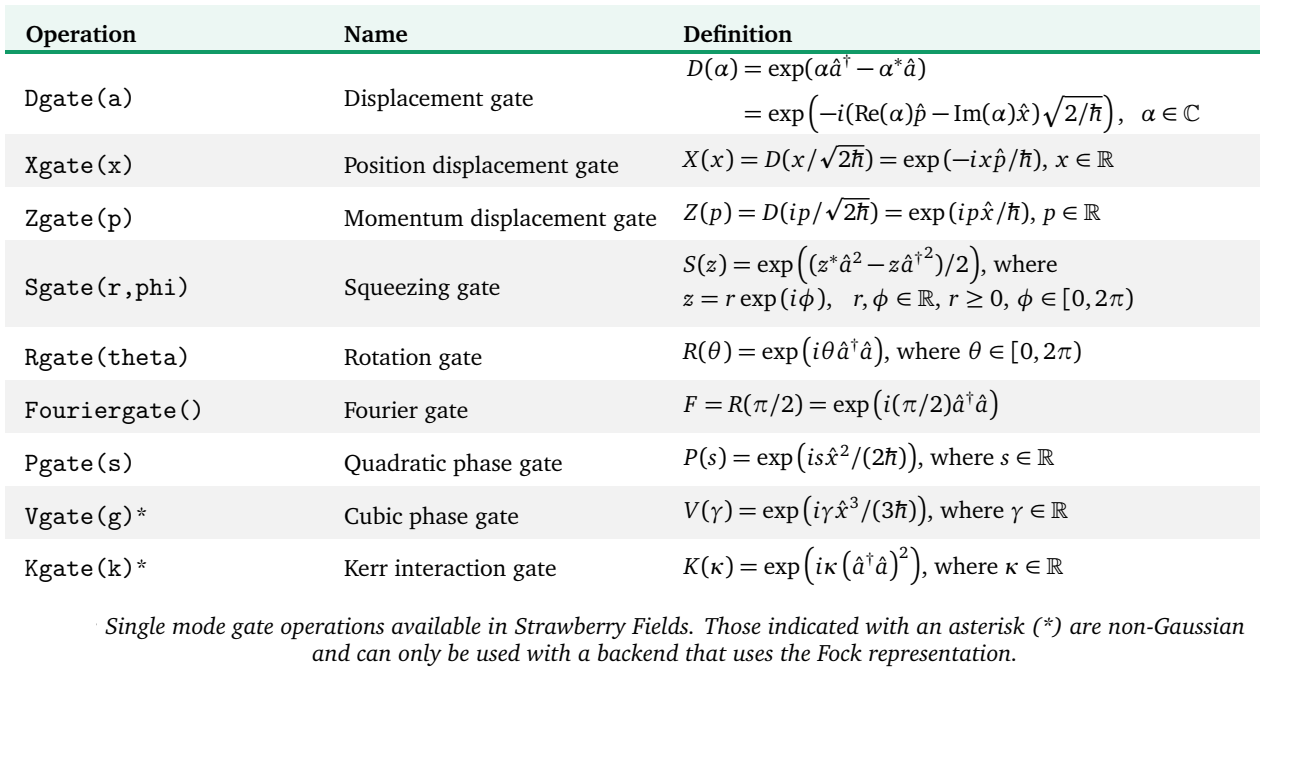

In [1]:
from IPython.display import Image
Image(filename='sf3.png')


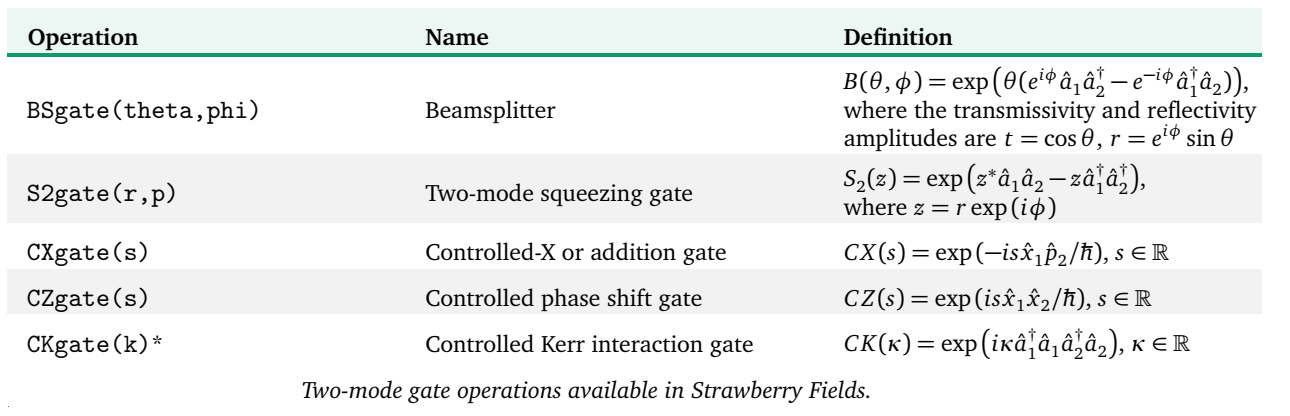

In [17]:
Image(filename='sf4.png')


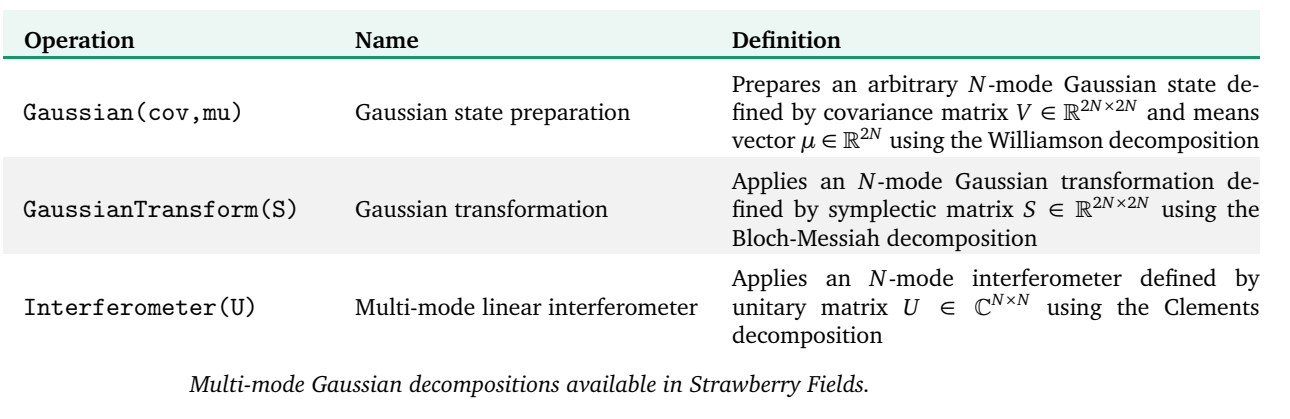

In [18]:
Image(filename='sf5.png')

## Measurements

1. Homodyne measurement (Homodyne measurement is a Gaussian projective measurement given by projecting the state onto the states)

$$|{x_\phi}⟩\langle {x_\phi}|$$

$$\hat{x}_\phi = \cos(\phi) \hat{x} + \sin(\phi)\hat{p}$$

2. Heterodyne measurement (Heterodyne measurement is a Gaussian projective measurement given by projecting the state onto the coherent states)

$$\frac{1}{\pi}|\alpha⟩\langle \alpha|$$

3. Photon counting measurement (Photon counting is a non-Gaussian projective measurement)

$$|n_i⟩\langle n_i|$$


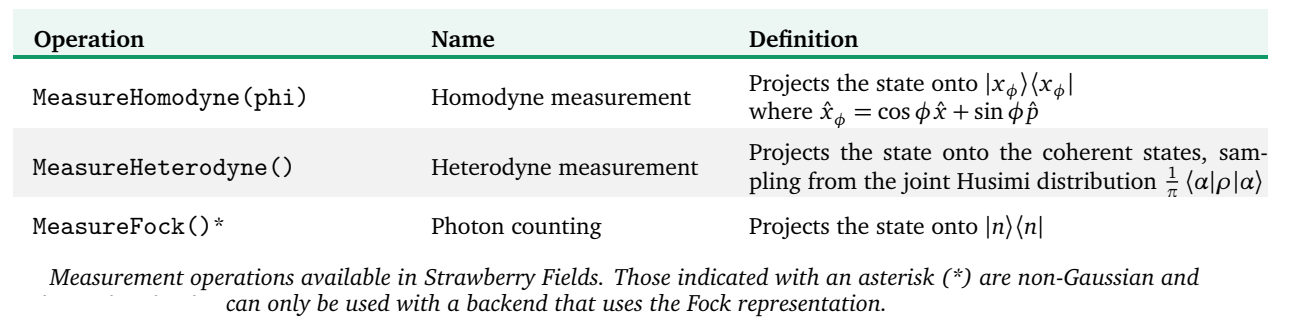

In [2]:
Image(filename='sf6.png')

## Decompositions

1. Williamson decomposition
For every positive definite real matrix $V\in\mathbb{R}^{2N\times 2N}$ there exists a symplectic matrix S and diagonal matrix D such that
$$V = S D S^T$$
where $D=\text{diag}(\nu_1,\dots,\nu_N,\nu_1,\dots,\nu_N)$ and $\{\nu_i\}$ are the eigenvalues of $|i\Omega V|$

$$\begin{split}\Omega = \begin{bmatrix}0 & I_N \\-I_N & 0 \end{bmatrix}\end{split}$$

`Implemented in Strawberry Fields as a state preparation decomposition by strawberryfields.ops.Gaussian`


2. Bloch-Messiah (or Euler) decomposition

For every symplectic matrix  $S\in\mathbb{R}^{2N\times 2N}$ there exists orthogonal symplectic matrices $O_1$ and $O_2$, and diagonal matrix $Z$, such that
$$S = O_1 Z O_2$$
where $Z=\text{diag}(e^{-r_1},\dots,e^{-r_N},e^{r_1},\dots,e^{r_N})$ represents a set of one mode squeezing operations with parameters ($r_1,…,r_N)$.

`Implemented in Strawberry Fields as a gate decomposition by strawberryfields.ops.GaussianTransform`

3. Rectangular decomposition

The rectangular decomposition allows any passive Gaussian transformation to be decomposed into a series of beamsplitters and rotation gates.

`Implemented in Strawberry Fields as a gate decomposition by strawberryfields.ops.Interferometer`

## Circuits

In Strawberry Fields, photonic quantum circuits are represented as `Program `objects. By creating a program, quantum operations can be applied, measurements performed, and the program can then be simulated using the various Strawberry Fields backends.

## Creating a quantum program

To construct a photonic quantum circuit in Strawberry Fields, a `Program` object must be created, and operations applied.

In [10]:
import strawberryfields as sf
from strawberryfields import ops

# create a 3-mode quantum program
prog = sf.Program(3)

with prog.context as q:
    ops.Sgate(0.54) | q[0]
    ops.Sgate(0.54) | q[1]
    ops.Sgate(0.54) | q[2]
    ops.BSgate(0.43, 0.1) | (q[0], q[2])
    ops.BSgate(0.43, 0.1) | (q[1], q[2])
    ops.MeasureFock() | q
    
#prog.print()    
#prog.draw_circuit()   

Note

The contents of a program can be viewed by calling the `Program.print()` method, or output as a qcircuit LATEX
document by using the `Program.draw_circuit()` method.

 Constructing quantum circuits always follows the same structure as the above example; in particular,
 
 1. A `with` statement is used to populate the program with quantum operations.
 
 
 2. `Program.context` is used within the with statement to return `q`, a representation of the quantum registers (qumodes or modes).
 
 
 3. Quantum operations are applied to the modes of the program using the syntax
 
 `ops.GateName(arg1, arg2) | (q[i], q[j], ...)`

## Simulating your program

Strawberry Fields provides several backend simulators for simulating your quantum program. To access the simulators, an `engine` must be initialized, which is responsible for executing the program on a specified backend (which can be either a local simulator, or a remote simulator/hardware device).

In [11]:
# initialize the fock backend with a
# Fock cutoff dimension (truncation) of 5
eng = sf.Engine("fock", backend_options={"cutoff_dim": 5})

Engine accepts two arguments, the backend name, and a dictionary of backend options. Available backends include:

1. The `fock` backend, written in NumPy.

This backend represents the quantum state and operations via the Fock basis, so can represent all possible CV states and operations. However numerical error is also introduced due to truncation of the Fock space—increasing the cutoff results in higher accuracy at a cost of increased memory consumption.

2. The `gaussian` backend, written in NumPy.

This backend represents the quantum state as a Gaussian, and operations as quantum operations. It is numerically exact, and consumes less memory and is less computationally intensive then the Fock backends. However, it cannot represent non-Gaussian operations and states, with the exception of terminal Fock measurements.


3. The `bosonic` backend, written in NumPy.

The bosonic backend is tailored to simulate states which can be represented as a linear combination of Gaussian functions in phase space. It provides very succinct descriptions of Gaussian states, just like the `gaussian backend`, but it can also provide descriptions of non-Gaussian states as well. Moreover, like in the gaussian backend, the application of the most common active and passive linear optical operations, like the displacement (`Dgate`, squeezing (`Sgate`), and beamsplitter (`BSgate`) gates, is extremely efficient.

4. The `tf` backend, written in TensorFlow 2

This backend represents the quantum state and operations via the Fock basis, but allows for backpropagation and optimization using TensorFlow.
















Once the engine has been initialized, the quantum program can be executed on the selected backend via `Engine.run()`:

In [18]:
result = eng.run(prog)

## Execution results

The returned `Result` object provides several useful properties for accessing the results of your program execution:

1. `Result.state`: The quantum state object contains details and methods for manipulation of the final circuit state. Not available for remote backends.

In [14]:
print(result.state)

<FockState: num_modes=3, cutoff=5, pure=True, hbar=2>


In [28]:
state = result.state
state.trace()
#state.dm().shape
#rho = state.dm()
#print(rho)

1.0

2. `Result.samples`: Measurement samples from any measurements performed.

In [20]:
result.samples

array([[2, 0, 4]])

## Common methods and attributes

`data`
	

Returns the underlying numerical (or symbolic) representation of the state.

`hbar`
	

Returns the value of $ℏ$ used in the generation of the state.

`is_pure`
	

Checks whether the state is a pure state.

`num_modes`
	

Gets the number of modes that the state represents.

`mode_names`
	

Returns a dictionary mapping the mode index to mode names.

`mode_indices`
	

Returns a dictionary mapping the mode names to mode indices.

`ket(**kwargs)`
	

The numerical state vector for the quantum state in the Fock basis.

`dm(**kwargs)`
	

The numerical density matrix for the quantum state in the Fock basis.

`reduced_dm(modes, **kwargs)`
	

Returns a reduced density matrix in the Fock basis.

`fock_prob(n, **kwargs)`
	

Probability of a particular Fock basis state.

`all_fock_probs(**kwargs)`
	

Probabilities of all possible Fock basis states for the current circuit state.

`mean_photon(mode, **kwargs)`
	

Returns the mean photon number of a particular mode.

`fidelity(other_state, mode, **kwargs)`
	

Fidelity of the reduced state in the specified mode with a user supplied state.

`fidelity_vacuum(**kwargs)`
	

The fidelity of the state with the vacuum state.

`fidelity_coherent(alpha_list, **kwargs)`
	

The fidelity of the state with a product of coherent states.

`wigner(mode, xvec, pvec)`
	

Calculates the discretized Wigner function of the specified mode.

`quad_expectation(mode[, phi])`
	

The $x^ϕ $operator expectation values and variance for the specified mode.


`poly_quad_expectation(A[, d, k, phi])`
	

The multi-mode expectation values and variance of arbitrary 2nd order polynomials of quadrature operators.

`number_expectation(modes)`
	

Calculates the expectation value of the product of the number operators of the modes.

`parity_expectation(modes)`
	

Calculates the expectation value of a product of parity operators acting on given modes

`p_quad_values(mode, xvec, pvec)`
	

Calculates the discretized p-quadrature probability distribution of the specified mode.

`x_quad_values(mode, xvec, pvec)`
	

Calculates the discretized x-quadrature probability distribution of the specified mode.


## Gaussian states

Backend that represent the quantum state using the Gaussian formalism (such as the gaussian backend) will return a GaussianState object, with the following methods and attributes.

`means()`
	

The vector of means describing the Gaussian state.

`cov()`
	

The covariance matrix describing the Gaussian state.

`reduced_gaussian(modes)`
	

Returns the vector of means and the covariance matrix of the specified modes.

`is_coherent(mode[, tol])`
	

Returns True if the Gaussian state of a particular mode is a coherent state.

`is_squeezed(mode[, tol])`
	

Returns True if the Gaussian state of a particular mode is a squeezed state.

`displacement([modes])`
	

Returns the displacement parameter$ α $of the modes specified.

`squeezing([modes])`
	

Returns the squeezing parameters $(r,ϕ)$ of the modes specified.


## Fock states

Backend that represent the quantum state in the Fock basis (such as the fock or tf backends) will return a FockState object.

`cutoff_dim`
	

The numerical truncation of the Fock space used by the underlying state.

`trace(**kwargs)`
	

Trace of the density operator corresponding to the state.

## Symbolic parameters

The quantum operations can take both numerical and symbolic parameters. The latter fall into two types:

1- Measured parameters: Certain quantum programs (e.g. quantum teleportation) require that operations can be conditioned on measurement results obtained during the execution of the program. In this case the parameter value is not known until the measurement is made (or simulated). The latest measurement result of qumode i is available via `q[i].par`.

2- Free parameters: A parametrized circuit template is a program that depends on a number of free parameters. These parameters can be bound to new fixed values each time the program is executed. The free parameters are created and accessed using the `Program.params()` method.


The symbolic parameters can be combined and transformed using basic algebraic operations, and the mathematical functions in the `strawberryfields.math` namespace.

In [25]:
import strawberryfields as sf
from strawberryfields import ops

# create a 2-mode quantum program
prog = sf.Program(2)

# create a free parameter named 'a'
a = prog.params('a')

# define the program
with prog.context as q:
    ops.Dgate(a ** 2)    | q[0]  # free parameter
    ops.MeasureX         | q[0]  # measure qumode 0, the result is used in the next operation
    ops.Sgate(1 - sf.math.sin(q[0].par)) | q[1]  # measured parameter
    ops.MeasureFock()    | q[1]

# initialize the Fock backend
eng = sf.Engine('fock', backend_options={'cutoff_dim': 5})

# run the program, with the free parameter 'a' bound to the value 0.9
result = eng.run(prog, args={'a': 0.9})

print(result.state)

<FockState: num_modes=2, cutoff=5, pure=True, hbar=2>


## Compilation

The Program object also provides the `Program.compile()` method that automatically transforms your circuit into an equivalent circuit with a particular layout or topology. For example, the gbs compile target will compile a circuit consisting of Gaussian operations and Fock measurements into canonical Gaussian boson sampling form.


In [29]:
prog2 = prog.compile(compiler="gbs")

## Decompositions

`Interferometer(U[, mesh, drop_identity, tol])`
	

Apply a linear interferometer to the specified qumodes.

`GraphEmbed(A[, mean_photon_per_mode, …])`
	

Embed a graph into an interferometer setup.

`BipartiteGraphEmbed(A[, …])`
	

Embed a bipartite graph into an interferometer setup.

`GaussianTransform(S[, vacuum, tol])`
	

Apply a Gaussian symplectic transformation to the specified qumodes. Prepare the specified modes in a Gaussian state.

In [30]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np


U = np.array([[-1j, 0,0,1],[0, -1j,1,0],[1j,0,0,1],[0,1j,1,0]])/np.sqrt(2)


eng = sf.Engine("gaussian")
prog = sf.Program(4)

with prog.context as q:
    
    #Squeezed(0.43) | q[0]
    Interferometer(U) | (q[0], q[1],q[2],q[3])

eng.run(prog)
eng.print_applied()


Run 0:
BSgate(1.571, 0) | (q[2], q[3])
Rgate(1.571) | (q[1])
BSgate(1.571, 0) | (q[1], q[2])
Rgate(1.571) | (q[0])
BSgate(0.7854, 0) | (q[0], q[1])
Rgate(3.142) | (q[0])
Rgate(3.142) | (q[1])
Rgate(3.142) | (q[2])
BSgate(-0.7854, 0) | (q[2], q[3])
BSgate(-1.571, 0) | (q[1], q[2])


## Quantum teleportation


Quantum teleportation - sometimes referred to as state teleportation to avoid confusion with gate teleportation - is the reliable transfer of an unknown quantum state across spatially separated qubits or qumodes, through the use of a classical transmission channel and quantum entanglement . Considered a fundamental quantum information protocol, it has applications ranging from quantum communication to enabling distributed information processing in quantum computation .

In general, all quantum teleportation circuits work on the same basic principle. Two distant observers, Alice and Bob, share a maximally entangled quantum state (in discrete variables, any one of the four Bell states; or in CV, a maximally entangled state for a fixed energy), and have access to a classical communication channel. Alice, in possession of an unknown state which she wishes to transport to Bob, makes a joint measurement of the unknown state and her half of the entangled state, by projecting onto the Bell basis. By transmitting the results of her measurement to Bob, Bob is then able to transform his half of the entangled state to an accurate replica of the original unknown state, by performing a conditional phase flip (for qubits) or displacement (for qumodes) .

While originally designed for discrete-variable quantum computation with qubits, the (spatially separated) quantum teleportation algorithm described above can be easily translated to CV qumodes; the result is shown in the following circuit:

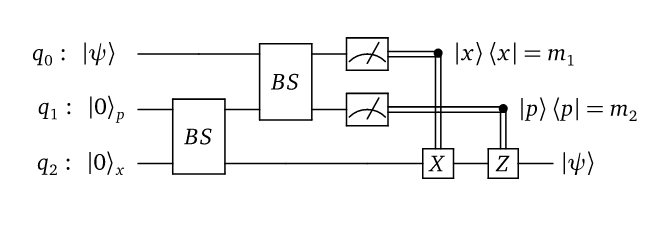

In [31]:
Image(filename='sf7.png')

This process can be explained as follows:

1- Here, qumodes q1 and q2 are initially prepared as (the unphysical) infinitely squeezed vacuum states in momentum and position space respectively,

$$ \begin{split}&|0\rangle_x \sim \lim_{z\rightarrow\infty} S(z)|0\rangle\\ &|0\rangle_p \sim
\lim_{z\rightarrow-\infty} S(z)|0\rangle=\frac{1}{\sqrt{\pi}}\int_{-\infty}^\infty |0\rangle~dx\end{split}$$


before being maximally entangled by a 50-50 beamsplitter:

$$BS(\pi/4,0)(\ket{0}_p\otimes\ket{0}_x)$$


2- These two qumodes are now spatially separated, with $|q1⟩$ held by Alice, and $|q2⟩$ held by Bob, with the two connected via the classical communication channels $c_0$ and $c_1$.


3- To teleport her unknown state $|ψ⟩$ to Bob, Alice now performs a projective measurement of her entire system onto the maximally entangled basis states. This is done by entangling $|ψ⟩$ and $|q1⟩$ via another 50-50 beamsplitter, before performing two homodyne measurements, in the $x$ and $p$ quadratures respectively.


4- The results of these measurements are then transmitted to Bob, who performs both a position displacement (conditional on the $x$ measurement) and a momentum displacement (conditional on the p measurement) to recover exactly the transmitted state $|ψ⟩$.


In [32]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

# set the random seed
np.random.seed(42)

prog = sf.Program(3)

alpha = 1+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    # prepare initial states
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # apply gates
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Perform homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]

    # Displacement gates conditioned on
    # the measurements
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(-sqrt(2) * q[1].par) | q[2]
    
    
eng = sf.Engine('fock', backend_options={"cutoff_dim": 15})

result = eng.run(prog, shots=1, modes=None, compile_options={})
print(result.samples)

[[0.19890199 0.17330173]]


## Boson sampling

Introduced by Aaronson and Arkhipov , boson sampling presented a slight deviation from the general approach in quantum computation. Rather than presenting a theoretical model of universal quantum computation (i.e., a framework that enables quantum simulation of any arbitrary Hamiltonian), boson sampling-based devices are instead an example of an intermediate quantum computer, designed to experimentally implement a computation that is thought to be intractable classically .

Boson sampling proposes the following quantum linear optics scheme. An array of single-photon sources is set up, designed to simultaneously emit single photon states into a multimode linear interferometer; the results are then generated by sampling from the probability of single photon measurements from the output of the linear interferometer.

For example, consider $N$
single photon Fock states, $|ψ⟩=|m1,m2,…,mN⟩$, composed of b=∑imi photons, incident on an $N$-mode linear interferometer, which performs the following linear transformation of the input mode creation and annihilations operators:


$$\begin{split}&\hat{a}^\dagger_{out_k} = \sum_{j=0}^N U_{kj}\hat{a}^\dagger_{in_j}\\ &\hat{a}_{out_k} =
\sum_{j=0}^N U_{jk}^\dagger\hat{a}_{in_j}\end{split}$$


Here, the unitary $U$ completely describes the interferometer. Thus, the probability of detecting $n_j$ photons at the jth output mode is given by

$$\langle{n_1,n_2,\dots,n_N}|{W}|{\psi}\rangle|^2$$

where $W$ represents the action of U on the Fock basis ($W$ is simply a homomorphism of $U$). The remarkable nature of the boson sampling problem to challenge the extended Church-Turing thesis lies in the fact that


$$\langle{n_1,n_2,\dots,n_N}|{W}|{\psi}\rangle|^2=\frac{\left|\text{Per}(U_{st})\right|^2}{m_1!m_2!\cdots m_N!n_1!n_2!\cdots n_N!}$$


The permanent of a matrix, defined by
$$\text{Per}(A) = \sum_{\sigma=S_N}\prod_{i=1}^N A_{i\sigma(i)}$$
where $S_N$ is the set of all permutations of $N $elements, is calculated in a similar fashion to the determinant, but unlike the determinant, the signatures of the permutations are not taken into account - every permutation is taken as a positive quantity.

For example, in the case of a 4 mode interferometer, with arbitrary $4×4$ unitary $U$, the quantum photonics circuit is given by

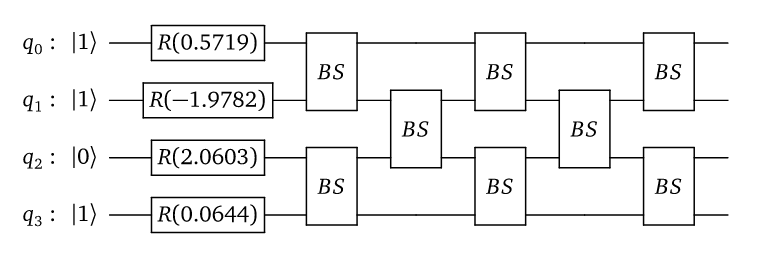

In [34]:
Image(filename='sf8.png')

In [35]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *

np.random.seed(42)

# import Strawberry Fields


# initialize a 4 mode program
boson_sampling = sf.Program(4)

with boson_sampling.context as q:
    # prepare the input fock states
    Fock(1) | q[0]
    Fock(1) | q[1]
    Vac     | q[2]
    Fock(1) | q[3]

    # rotation gates
    Rgate(0.2719)  | q[0]
    Rgate(1.9782) | q[1]
    Rgate(2.1603)  | q[2]
    Rgate(0.0644)  | q[3]

    # beamsplitter array
    BSgate(0.7804, 0.8578)  | (q[0], q[1])
    BSgate(0.06406, 0.9165) | (q[2], q[3])
    BSgate(0.5473, 0.1176)   | (q[1], q[2])
    BSgate(0.545, 0.2517)   | (q[0], q[1])
    BSgate(0.1323, 0.9946)  | (q[2], q[3])
    BSgate(0.311, 0.3231)   | (q[1], q[2])
    BSgate(0.7302, 0.1798)  | (q[0], q[1])
    BSgate(0.4368, 0.6157)  | (q[2], q[3])



eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})

######################################################################
# We can now execute the program with the engine:

results = eng.run(boson_sampling)


probs = results.state.all_fock_probs()

# print the joint Fock state probabilities
print(probs[1, 1, 0, 1])
print(probs[2, 0, 0, 1])

0.06067475681040104
0.08843004590007668
